# Assignment #3 - Reinforcement Learning

### <font color="red"> DUE: Mar 19 (Monday) 11:00 pm </font>  

<font color="blue"> Dhwani Contractor </font>

# I. Overview



To implement Reinforcement learning with either Q-learning or SARSA in the following real-world problems

1) Maze Problem

2) Blackjack Problem

# II. Problems 

## A. Maze Problem (Practice)

Describe the problem. Read the following code and explain the GridWorld environmen
As shown in the image, goal state contains the maximum reward value (which is shown as green colored cell and has the reward 1). Open space can have any value depending upon the path that gives the maximum rewards. The wall and obsticles have the least rewards (which is shown as red colored cell and has the reward -1).
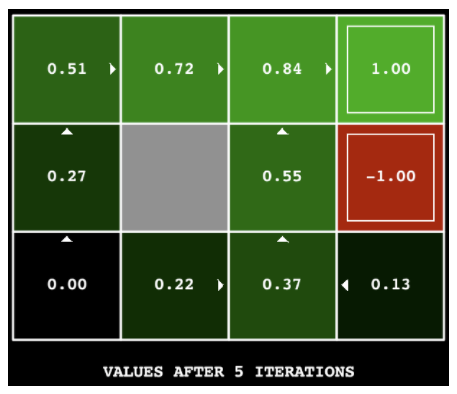

In [124]:
import collections
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Sample Grid Environment File

Simple text file with three characters, 'O', 'H', and 'G'.
- 'O': open space
- 'H': Wall or obstacles
- 'G': Goal location 

In [125]:
file =open("grid.txt")

### GridWorld Class


In [126]:
# maze example

class GridWorld:
    """ Grid World environment
            there are four actions (left, right, up, and down) to move an agent
            In a grid, if it reaches a goal, it get 30 points of reward.
            If it falls in a hole or moves out of the grid world, it gets -5.
            Each step costs -1 point. 

        to test GridWorld, run the following sample codes:

            env = GridWorld('grid.txt')

            env.print_map()
            print [2,3], env.check_state([2,3])
            print [0,0], env.check_state([0,0])
            print [3,4], env.check_state([3,4])
            print [10,3], env.check_state([10,3])

            env.init([0,0])
            print env.next(1)  # right
            print env.next(3)  # down
            print env.next(0)  # left
            print env.next(2)  # up
            print env.next(2)  # up

        Parameters
        ==========
        _map        ndarray
                    string array read from a file input
        _size       1d array
                    the size of _map in ndarray
        goal_pos    tuple
                    the index for the goal location
        _actions    list
                    list of actions for 4 actions
        _s          1d array
                    current state
    """
    def __init__(self, fn):
        # read a map from a file
        self._map = self.read_map(fn)
        self._size = np.asarray(self._map.shape)
        self.goal_pos = np.where(self._map == 'G')

        # definition of actions (left, right, up, and down repectively)
        self._actions = [[0, -1], [0, 1], [-1, 0], [1, 0]]
        self._s = None

    def get_cur_state(self):
        return self._s

    def get_size(self):
        return self._size

    def read_map(self, fn):
        grid = []
        with open(fn) as f:
            for line in f:
                grid.append(list(line.strip()))
        return np.asarray(grid)

    def print_map(self):
        print( self._map )

    def check_state(self, s):
        if isinstance(s, collections.Iterable) and len(s) == 2:
            if s[0] < 0 or s[1] < 0 or\
               s[0] >= self._size[0] or s[1] >= self._size[1]:
                    return 'N'
            return self._map[tuple(s)].upper()
        else:
            return 'F'  # wrong input

    def init(self, state=None):
        if state is None:
            s = [0, 0]
        else:
            s = state

        if self.check_state(s) == 'O':
            self._s = np.asarray(state)
        else:
            raise ValueError("Invalid state for init")

    def next(self, a):
        s1 = self._s + self._actions[a]
        # state transition
        curr = self.check_state(s1)
        
        if curr == 'H' or curr == 'N':
            return -5
        elif curr == 'F':
            warnings.warn("invalid state " + str(s1))
            return -5
        elif curr == 'G':
            self._s = s1
            return 30
        else:
            self._s = s1
            return -1
        
    def is_goal(self):
        return self.check_state(self._s) == 'G'
            
    def get_actions(self):
        return self._actions

In [127]:
env = GridWorld("grid.txt")
env.print_map()
env._s

[['O' 'O' 'O' 'H' 'O' 'O' 'O' 'O' 'O']
 ['O' 'O' 'O' 'H' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'H' 'H' 'H' 'O' 'O']
 ['O' 'O' 'H' 'O' 'O' 'O' 'O' 'O' 'H']
 ['O' 'O' 'H' 'O' 'O' 'O' 'G' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O']]


In [128]:
# top-left to (0,0)
def coord_convert(s, sz):
    return [s[1], sz[0]-s[0]-1]

## B. Blackjack-V0

![](https://upload.wikimedia.org/wikipedia/commons/a/a2/Blackjack_game_1.JPG)

Now, we play Blackjack! 
https://gym.openai.com/envs/Blackjack-v0/


# III. Methods

- Decide your TD learning approach: SARSA or Q-learning? ** SARSA **
- Describe your approach and the reason why you select it.

we update the Q with assumption that we follow a certain behavior policy. Thus, we call this as *on-policy control*, or **SARSA**. 

$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t)) 
$$

**[Algorithm: SARSA]**
![](http://incompleteideas.net/book/ebook/pseudotmp8.png)

- Finish epsilon_greedy function and other TODOs. Explain it.
Picking an action can be simple by selecting one with maximum Q value, so *Greedy!*. 

$$
a^* = \arg \max_a Q(S_t, a)
$$

However, this can cause limited experience to develop good Q estimation, and eventually a good policy. 
Without new data, greedy action selection will repeat the same actions, or repeatedly *exploit* your current knowledge. Thus, you need to *explore* other non-greedy actions to increase the experience to improve the Q estimation. 

This is called "exploration-exploitation dilemma." 


One of the way for this dilemma is $\epsilon$-greedy action selection. With a parameter $\epsilon \in [0, 1]$, we can control the exploration and exploitation level. When $\epsilon = 0$, the actions are selected in greedy manner, but when $\epsilon = 1$, the actions are selected randomly. 



## RLAgent for Maze


** Maze **
- Class RLAgent has the different function which handles the training of the object of maze agent. 

**1) __init__ :**
Initialization of environment, size of the environment amd Q-table with respect to size of the environment.

**2) greedy: **
Returns the argument with maximum vlaue inside the array.

**3) epsilon_greedy: **
compares the value with epsilon and chooses what way to go according to the value of rewards

**4) train**
- Initializes the parameters
- Initializes the Q value with all zeroes.
- Get the current state in variable 's' and current action in 'a'
- Get the reward for the next state
- Get the next step in variable 's1'
- Choose the next action 'a1' by epsilon_greed function
- Update Q-table with the given equation.
- Check if the goal state is reached, make update Q-table with 0 because when we reach goal state we want agent to stay in that state and not move any further
- Make next state current state.
- Make next action current acction.


In [150]:
class RLAgent: 
    """
        Reinforcement Learning Agent Model for training/testing
        with Tabular function approximation
        
    """
    
    def __init__(self, evn):
        self.env = env
        self.size = env.get_size()
        self.n_a = len(env.get_actions())
        
        # self.Q table including the surrounding border
        self.Q = np.zeros((self.size[0], self.size[1], self.n_a))
   
    def greedy(self,Q, s):
        return np.argmax(Q[s[0],s[1]])  # greedy action selection

    def epsilon_greed(self, epsilon, s):
        # TODO: Finish this function
        if np.random.rand() < epsilon:
            return np.random.randint(self.n_a)
        else:
            return self.greedy(self.Q,s)
        
    def train(self, start, **params):
    
        # parameters
        gamma = params.pop('gamma', 0.99)
        alpha = params.pop('alpha', 0.1)
        epsilon= params.pop('epsilon', 0.1)
        maxiter= params.pop('maxiter', 1000) 
        maxstep= params.pop('maxstep', 1000)
        
        # init self.Q matrix
        self.Q[...] = 0
        self.Q[self.env._map == 'H'] = -np.inf
        
        # online train
        # rewards and step trace
        rtrace = []
        steps = []
        for j in range(maxiter):

            env.init(start)
            s = env.get_cur_state()
            # selection an action
            a = self.epsilon_greed(epsilon, s)

            rewards = []
            trace = np.array(coord_convert(s, self.size))
            # run simulation for max number of steps 
            for step in range(maxstep):
                # move
                r = env.next(a)
                s1 = env.get_cur_state()
                a1 = self.epsilon_greed(epsilon, s1)

                rewards.append(r)
                trace = np.vstack((trace, coord_convert(s1, self.size)))

                # TODO: FINISH SARSA/Q-learning Rule here
                # update self.Q table 
                array_Q_a=self.Q[s1[0], s1[1], a1]
                #temp=np.argmax(array_Q_a)
                self.Q[s[0], s[1], a] = self.Q[s[0], s[1], a] + alpha*(r + (gamma*array_Q_a) - self.Q[s[0], s[1], a])
                #self.Q(s[0],s[1],a) = self.Q(s[0],s[1],a) + alpha*[r + gamma*(np.argmax(self.Q(s1[0],s1[1],:)))-self.Q(s[0],s[1],a)]
                if env.is_goal(): # reached the goal
                    # TODO: Why is this zero? Describe this in your code explanation.
                    self.Q[s1[0], s1[1], a1] = 0
                    break

                s = s1
                a = a1

            rtrace.append(np.sum(rewards))
            steps.append(step+1)
        return rtrace, steps, trace # last trace of trajectory

    def test(self, start, maxstep=1000):
    # TODO: Add your test routine that exmines learned policy
    #      Using the learned policy, generate the trajectory of 
        rtrace = []
        steps = []
        gamma=0.99
        alpha=0.1
        epsilon=0.1 
        maxiter=100 
        
        for j in range(maxiter):
    
            env.init(start)
            s = env.get_cur_state()
            # selection an action
            a = self.epsilon_greed(epsilon, s)
    
            rewards = []
            trace = np.array(coord_convert(s, self.size))
            # run simulation for max number of steps 
            for step in range(maxstep):
                # move
                r = env.next(a)
                s1 = env.get_cur_state()
                a1 = self.epsilon_greed(epsilon, s1)
    
                rewards.append(r)
                trace = np.vstack((trace, coord_convert(s1, self.size)))
    
                # TODO: FINISH SARSA/Q-learning Rule here
                # update self.Q table 
                array_Q_a=self.Q[s1[0], s1[1], a1]
                #temp=np.argmax(array_Q_a)
                self.Q[s[0], s[1], a] = self.Q[s[0], s[1], a] + alpha*(r + (gamma*array_Q_a) - self.Q[s[0], s[1], a])
                #self.Q(s[0],s[1],a) = self.Q(s[0],s[1],a) + alpha*[r + gamma*(np.argmax(self.Q(s1[0],s1[1],:)))-self.Q(s[0],s[1],a)]
                if env.is_goal(): # reached the goal
                    # TODO: Why is this zero? Describe this in your code explanation.
                    self.Q[s1[0], s1[1], a1] = 0
                    break
    
                s = s1
                a = a1
    
            rtrace.append(np.sum(rewards))
            steps.append(step+1)
        return trace  



## RLAgent for Gym (Blackjack-V0)

### Blackjack Rules 
Blackjack is a card game where the goal is to obtain cards that sum to as near as possible to 21 without going over. They’re playing against a fixed dealer. 
Here are the rules of the game:

Face cards (Jack, Queen, King) have point value 10. Aces can either count as 11 or 1, and it’s called ‘usable’ at 11. This game is placed with an infinite deck (or with replacement). The game starts with each (player and dealer) having one face up and one face down card.

The player can request additional cards until they decide to stop or exceed 21 (bust). After the player sticks, the dealer reveals their facedown card, and draws until their sum is 17 or greater. If the dealer goes bust, the player wins. If neither player nor dealer busts, the outcome (win, lose, draw) is decided by whose sum is closer to 21.

The reward for winning is +1, drawing is 0, and losing is -1.

#### Strategy
A reinforcement learning technique, Q-learning, will be used to solve this problem. A Q-table is built for all state-action pairs and after taking an action at the end of each round of the game, its corresponding entry in the Q-table is updated based on the reward received. The learning process is stopped when the agent has sufficiently explored the environment. At this point, we would have the optimized Q-table which is the strategy the agent has learned to play blackjack.

It is found that, at the beginning of each round, the environment deals the player and the dealer two random cards each and makes available the values of the sum of the player’s hand, the dealer’s ‘up card’ and whether or not the player has a usable ace card (ace card usable means its value is 11 instead of 1 when not usable). This can be fed to an agent in the following format - (player’s hand value, dealer’s up card, usable_ace). 


Q-learning will be used to solve this problem as the number of states is reasonably small.

- Possible values of sum of agent’s cards [2, 21] = 20
- Face up card of dealer [1, 10] = 10
- Player has usable card [0, 1] = 2
Size of the state space is 400.

- Class Agent contains different function that handles the object of blackjack agent
**1) __init__:** Initialization of valid actions,Q-table, epsilon, alpha, gamma.

**2)create_Q_if_new_observation: **Set intial Q values to 0.0 if observation not already in Q table

**3)get_maxQ: **Called when the agent is asked to find the maximum Q-value of all actions based on the 'observation' the environment is in.

**4)epsilon_greedy: **Choose which action to take, based on the observation. If observation is seen for the first time, initialize its Q values to 0.0

**4)train: **After reseting the observation, trains the Q to get the maximum rewards. The heart of the train function is implementation of the equation mentioned above. It is implemented in the **learn** function.


In [179]:
import random

class Agent():
    def __init__(self, env, epsilon=0.1, alpha=0.5, gamma=0.9, num_episodes_to_train=30000):
        self.env = env

        self.valid_actions = list(range(self.env.action_space.n))

        # Set parameters of the learning agent
        self.Q = dict()          # Q-table which will be a dictionary of tuples
        self.epsilon = epsilon   # Random exploration factor
        self.alpha = alpha       # Learning factor
        self.gamma = gamma       # Discount factor- closer to 1 learns well into distant future


        self.num_episodes_to_train_left = num_episodes_to_train
    

    def create_Q_if_new_observation(self, observation):
        if observation not in self.Q:
            self.Q[observation] = dict((action, 0.0) for action in self.valid_actions)


        self.create_Q_if_new_observation(observation)
        return max(self.Q[observation].values())

    def epsilon_greed(self, observation):
        self.create_Q_if_new_observation(observation)

        if random.random() > self.epsilon:
            maxQ = self.get_maxQ(observation)

            action = random.choice([k for k in self.Q[observation].keys()
                                    if self.Q[observation][k] == maxQ])
        else:
            action = random.choice(self.valid_actions)
        return action


    def learn(self, observation):
        action = self.epsilon_greed(observation)
        next_observation, reward, is_done, _ = self.env.step(action)
        self.Q[observation][action] += self.alpha * (reward
                                                     + (self.gamma * self.get_maxQ(next_observation))
                                                     - self.Q[observation][action])
        return reward, is_done
    
    def train(self,num_rounds,num_samples):
        average_payouts = []

        observation=env.reset()
        for sample in range(num_samples):
            round = 1
            total_payout = 0 
            while round <= num_rounds:

                payout, is_done = self.learn(observation)
                total_payout += payout
                observation = next_observation
                if is_done:
                    observation = self.env.reset()
                    round += 1
            average_payouts.append(total_payout)            
        return average_payouts

# IV - Results

### Result of Maze

In [163]:
num_gamma_values = [0.1,0.2,0.3,0.4,0.5]
avg_payout_vs_gamma=[]
for g in num_gamma_values:
    rtrace, steps, trace = agent.train(start, 
                                   gamma=g, 
                                   alpha=0.1, 
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=1000)
    avg_payout_vs_gamma.append(sum(rtrace)/len(rtrace))

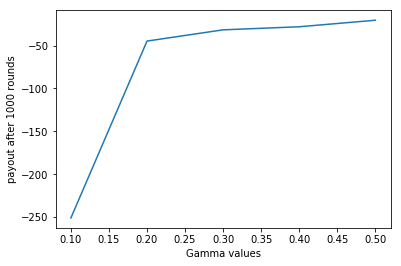

In [164]:
plt.plot(num_gamma_values, avg_payout_vs_gamma)
plt.xlabel('Gamma values')
plt.ylabel('payout after 1000 rounds')
plt.show()

In [167]:
num_alpha_values = [0.1,0.2,0.3,0.4,0.5]
avg_payout_vs_alpha=[]
for a in num_alpha_values:
    rtrace, steps, trace = agent.train(start, 
                                   gamma=0.5, 
                                   alpha=a, 
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=1000)
    avg_payout_vs_alpha.append(sum(rtrace)/len(rtrace))

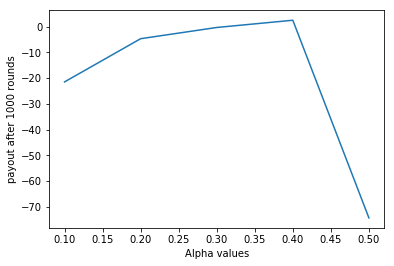

In [168]:
plt.plot(num_epsilon_values,avg_payout_vs_alpha)
plt.xlabel('Alpha values')
plt.ylabel('payout after 1000 rounds')
plt.show()

In [170]:
num_epsilon_values = [0.1,0.2,0.3,0.4,0.5]
avg_payout_vs_eps=[]
for e in num_epsilon_values:
    rtrace, steps, trace = agent.train(start, 
                                   gamma=0.5, 
                                   alpha=0.4, 
                                   epsilon=e, 
                                   maxiter=100, 
                                   maxstep=1000)
    avg_payout_vs_eps.append(sum(rtrace)/len(rtrace))

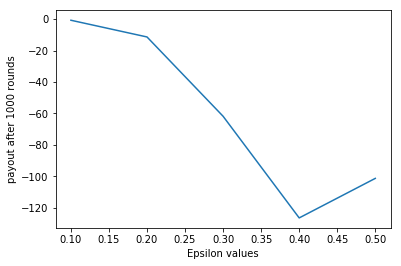

In [171]:
plt.plot(num_epsilon_values,avg_payout_vs_eps)
plt.xlabel('Epsilon values')
plt.ylabel('payout after 1000 rounds')
plt.show()

### Result for Blackjack

In [98]:
import gym
env = gym.make('Blackjack-v0')
import matplotlib.pyplot as plt

num_epsilon_values = [0.1,0.2,0.3,0.4,0.5]
avg_payout_vs_eps=[]
for e in num_epsilon_values:
    agent = Agent(env=env,epsilon=e,alpha=0.5, gamma=0.99, num_episodes_to_train=800)
    num_rounds = 1000#payout calculated over num_rounds
    num_samples = 1000 # num_rounds simulated over num_samples
    average_payouts=agent.train(num_rounds,num_samples)
    avg_payout_vs_eps.append(sum(average_payouts)/(num_samples))

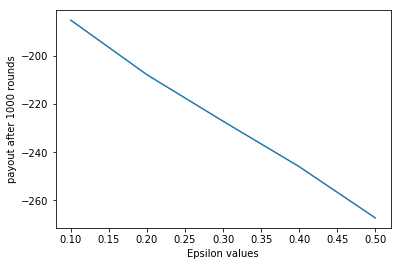

In [104]:
plt.plot(num_epsilon_values,avg_payout_vs_eps)
plt.xlabel('Epsilon values')
plt.ylabel('payout after 1000 rounds')
plt.show()

In [108]:
num_alpha_values = [0.1,0.2,0.3,0.4,0.5]
avg_payout_vs_alpha=[]
for a in num_alpha_values:
    agent = Agent(env=env,epsilon=0.1,alpha=a, gamma=0.99, num_episodes_to_train=800)
    num_rounds = 1000#payout calculated over num_rounds
    num_samples = 1000 # num_rounds simulated over num_samples
    average_payouts=agent.train(num_rounds,num_samples)
    avg_payout_vs_alpha.append(sum(average_payouts)/(num_samples))

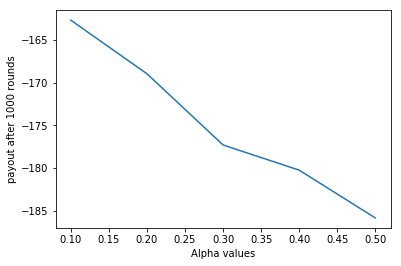

In [109]:
plt.plot(num_epsilon_values,avg_payout_vs_alpha)
plt.xlabel('Alpha values')
plt.ylabel('payout after 1000 rounds')
plt.show()

In [110]:
num_gamma_values = [0.2,0.4,0.6,0.8,1]
avg_payout_vs_gamma=[]
for g in num_gamma_values:
    agent = Agent(env=env,epsilon=0.1,alpha=0.1, gamma=g, num_episodes_to_train=800)
    num_rounds = 1000 # payout calculated over num_rounds
    num_samples = 1000 # num_rounds simulated over num_samples
    average_payouts=agent.train(num_rounds,num_samples)
    avg_payout_vs_gamma.append(sum(average_payouts)/(num_samples))

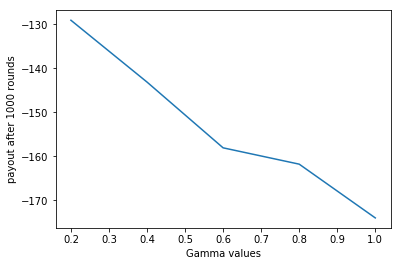

In [112]:
plt.plot(num_gamma_values, avg_payout_vs_gamma)
plt.xlabel('Gamma values')
plt.ylabel('payout after 1000 rounds')
plt.show()

In [113]:
num_episode_values = [200,400,600,800,1000]
avg_payout_vs_episode=[]
for epi in num_episode_values:
    agent = Agent(env=env,epsilon=0.1,alpha=0.1, gamma=0.2, num_episodes_to_train=epi)
    num_rounds = 1000 # payout calculated over num_rounds
    num_samples = 1000 # num_rounds simulated over num_samples
    average_payouts=agent.train(num_rounds,num_samples)
    avg_payout_vs_episode.append(sum(average_payouts)/(num_samples))

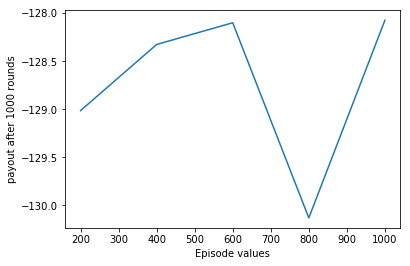

In [114]:
plt.plot(num_episode_values, avg_payout_vs_episode)
plt.xlabel('Episode values')
plt.ylabel('payout after 1000 rounds')
plt.show()

### Utility functions for Plotting


In [131]:
### Plotting tools 

def plot_trace(agent, start, trace, title="test trajectory"):
    plt.plot(trace[:, 0], trace[:, 1], "ko-")
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.xlim([0, agent.size[1]])
    plt.ylim([0, agent.size[0]])
    

def plot_train(agent, rtrace, steps, trace, start):

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(221)
    # TODO: plot rewards 
    ax.plot(rtrace)
    plt.ylabel("sum of rewards")

    ax1 = fig.add_subplot(222)
    # TODO: plot steps
    ax1.plot(steps)
    plt.ylabel("# steps")

    # contour plot for agent.Q
    ax2 = fig.add_subplot(223)
    xs = range(agent.size[1])
    ys = range(agent.size[0])
    maxQ = np.max(agent.Q, axis=2)
    h_b = (maxQ==-np.inf)
    maxQ[h_b] = 0
    maxQ[h_b] = np.min(maxQ) - 100
    cs = plt.contourf(xs, ys[::-1], maxQ)
    plt.colorbar(cs)
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.ylabel("max agent.Q")

    # plot traces
    ax3 = fig.add_subplot(224)
    plot_trace(agent, start, trace, "trace of the last episode")

    plt.plot()

### Training and Testing with GridWorld of Maze

### Final Model
The optimal value is the one in which the average payout is maximum. Note that the average payout values are in negative hence the low absolute value is actually higher negative value.

As per all the above graphs, the optimal value of all the parameters are as below

- epsilon = 0.1
- alpha = 0.4
- gamma = 0.5


In [172]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.5, 
                                   alpha=0.4, 
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=1000)

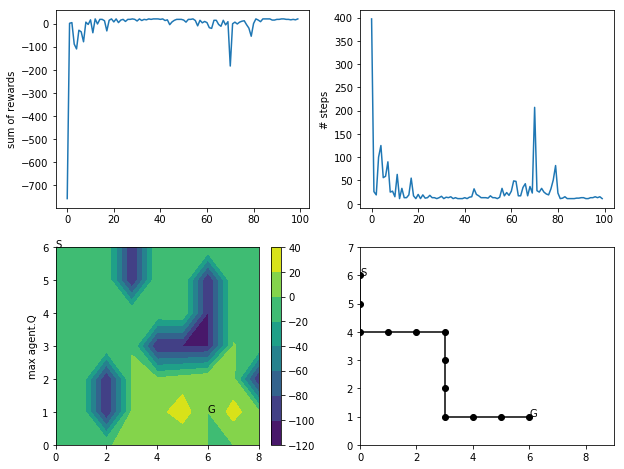

In [173]:
plot_train(agent, rtrace, steps, trace, start)

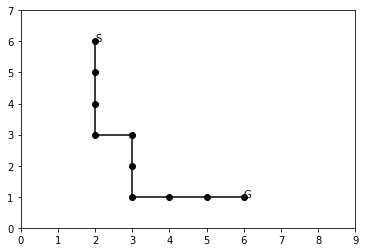

In [174]:
test_start = [0,2]
test_trace = agent.test(test_start)
plot_trace(agent, test_start, test_trace)

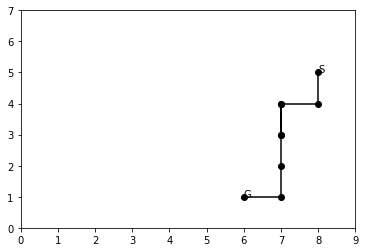

In [175]:
test_start = [1,8]
test_trace = agent.test(test_start)
plot_trace(agent, test_start, test_trace)

### Reading and Analysis of learning results

As the optimal value is selected for gamma, alpha and epsilon, sum of rewards increases significantly even in lower number of iterations. Plus it also gives the best results in test.

### Final Model
The optimal value is the one in which the average payout of 1000 rounds is maximum. Note that the average payout values are in negative hence the low absolute value is actually higher negative value.

As per all the above graphs, the optimal value of all the parameters are as below

- epsilon = 0.1
- alpha = 0.1
- gamma = 0.2
- num_episodes_to_train = 700

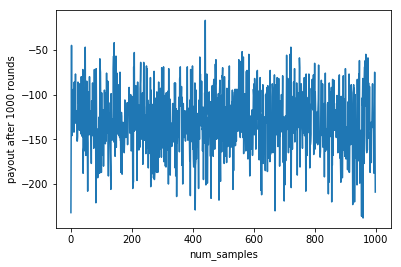

Average payout after 1000 rounds is -129.38


In [180]:
import gym
env = gym.make('Blackjack-v0')
import matplotlib.pyplot as plt

agent = Agent(env=env,epsilon=0.1,alpha=0.1, gamma=0.2, num_episodes_to_train=700)
num_rounds = 1000#payout calculated over num_rounds
num_samples = 1000 # num_rounds simulated over num_samples
average_payouts=agent.train(num_rounds,num_samples)

# Plot payout per 1000 episodes for each value of 'sample'
plt.plot(average_payouts)           
plt.xlabel('num_samples')
plt.ylabel('payout after 1000 rounds')
plt.show()      
    
print ("Average payout after {} rounds is {}".format(num_rounds, sum(average_payouts)/(num_samples)))


### Reading and Analysis of learning results

As the optimal value is selected for gamma, alpha and epsilon, sum of rewards increases significantly. In the normal stratagy, the Average payout after 1000 rounds is around -400.0 [3]. As the output of the given strategy is greater than normal strategy payout which is -129.053 here.

# V. Conclusions

Major challenge was to implement the Blackjack. It took lots of trial and error.

The technique to find the optimal value of gamma, epsilon and alpha took a while to be finalized

# VI. References 

 [1] http://ai.berkeley.edu/reinforcement.html
 
 [2] https://stats.stackexchange.com/questions/326788/when-to-choose-sarsa-vs-q-learning
 
 [3] https://curiouscoder.space/blog/machine%20learning/teaching-a-computer-blackjack-using-reinforcement-learning/
 
 [4] Reading assignment by Prof. Jake

# Extra Credit

- Let us have Blackjack-V0 Tournament in class (Mar 22nd.)!
- Top 4 students will get an extra credit. 
- 2 (or more?) unique training attemps will also get an extra credit. (Sales for it to be considered.) 

## Grading

We will test your notebook with an additional grid.txt file. Please make sure to test in different maze input files. 

points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Maze Problem | 
 | 5| Includes description of maze problem
 | 5| Explains the GridWorld
10 | Blackjack
 | 5| Includes description of maze problem
 | 5| Explains the Backjack-V0 (OpenAI Gym)
25 | Methods | 
 | 5| Review of the SARSA and Q-Learning
 | 5| Choice of TD learning and Reason
 |10| Implementation of the selected approach
 | 5| explanation of the codes
45 | Results 
| 5| Reports the selected parameters for both problems. 
|20| Experimental outputs that show the choice of parameters. How do you choose them? (10 points per each problem)
|10| Output plots (5 for each)
|10| reading and analysis of learning results and plots (5 for each)
5 | Conclusions 
